# Итоговая работа.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

**a)** Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).



In [3]:
def cosine( a, b ):
    """
    Подсчет косинуса угла между векторами a, b по их координатам
    """
    
    # длины векторов
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )
    
    return np.dot( a, b ) / ( aLength * bLength )

In [4]:
dict_ = {'user1': [], 'user2': [], 'cos': []}

for user1 in range(len(raitings)):
    for user2 in range(user1, len(raitings)):
        if user1 != user2:
            dict_['user1'].append(user1 + 1)
            dict_['user2'].append(user2 + 1)
            dict_['cos'].append(cosine(raitings[user1], raitings[user2]))

df = pd.DataFrame(dict_)
df.sort_values(by='cos', ascending=False).head(10)

,user1,user2,cos
23,3,10,0.918731
7,1,9,0.910660
44,9,10,0.900938
33,5,9,0.879485
11,2,5,0.871381
8,1,10,0.860108
29,4,10,0.858869
38,6,10,0.855149
1,1,3,0.849215
17,3,4,0.846694


**b)** Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [5]:
from sklearn.decomposition import PCA

In [6]:
X = raitings 

In [7]:
pca = PCA(n_components=5)

In [8]:
XPCAreduced = pca.fit_transform(X)
XPCAreduced

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

## Задание 2


Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [9]:
from scipy.misc import derivative

In [10]:
def f(x):
    return (np.tan(np.sin(x) + np.cos(2 * x + 3)))**2

In [11]:
derivative(f, x0=1.0, dx=1e-6)

55.3859176464222

## Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**.

In [12]:
from scipy.optimize import differential_evolution

In [13]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [14]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [15]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

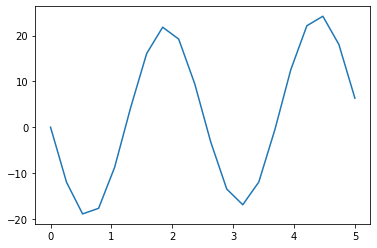

In [16]:
plt.plot(x, fx)
plt.show()

In [17]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [18]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(error, bounds, seed=42)
result

     fun: 1.5130289208187264e-06
 message: 'Optimization terminated successfully.'
    nfev: 2073
     nit: 66
 success: True
       x: array([ 3. , -2.5])

In [19]:
error([3, -2.5])

1.5163282505170628e-06

## Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [21]:
rand_var = np.random.randint(0, high=100, size=20)
rand_var

array([96, 56, 96,  1, 14, 71, 88, 69, 31, 46, 74, 87, 48, 34,  1, 12, 19,
       81, 27,  6])

In [22]:
sample = np.random.choice(rand_var, size=50)

In [23]:
np.mean(sample)

50.34

Text(0.5, 0, '$x$')

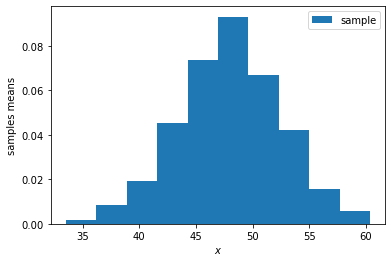

In [24]:
samples_count = 1000
# Массивы для сохранения средних по выборкам
a1 = np.array([])

for number in range(samples_count):
    sample = np.random.choice(rand_var, size=50)
    a1 = np.append(a1, np.mean(sample))
    
plt.hist(a1, density=True, label='sample')
plt.legend()
plt.ylabel('samples means')
plt.xlabel('$x$')

## Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

In [25]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [26]:
a, U = np.linalg.eig(m)
print('Eigenvalues:')
print(np.array(a, dtype=float))
print('\nEigenvectors:')
print(U)

Eigenvalues:
[ 3. -1.]

Eigenvectors:
[[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]
